## Motivation

The dataset is [all_billionaires_1997_2023.csv](https://www.kaggle.com/datasets/guillemservera/forbes-billionaires-1997-2023)
. Exploring global wealth distribution is intriguing and challenging. This analysis will focus on industries and countries with concertrated wealth. Besides, the role of women in these sectors and examining wealth disparities are parts of analysis. My goal is allowing users to access wealth distribution in specific industries and countries through interactive buttons, providing intuitive insights into wealth disparities and the role of women.

## Basic stats
Data cleaning and preprocessing: 
1. chose the data from 2010 to 2023, because the data before 2010 is small and missing data seriously
2. standardized and removed duplicates from the 'business_industries' attribute
3. dropped rows with NaN values in 'business_industries,' 'country_of_residence,' 'age,' and 'gender'
4. converted the format of 'net_worth' from numerical values followed by 'B' to pure numerical values

In terms of industries, both the **Energy** and **Media & Entertainment** sectors have shown minimal variations in billionaire counts over the past 14 years.The age range spans from 21 to 101 years old, and the United State is with the widest age rang among billionaires. A significant disparity in wealth between the top 10% of billionaires and those in the 10%-20% bracket. Among the top industries with the highest cumulative wealth, the **food & beverage** sector has the highest number of female billionaires.

## Data Analysis

In terms of industries, both the Energy and Media & Entertainment sectors have shown minimal variations in billionaire counts over the past 14 years, indicating that wealth in these fields remains concentrated among specific individuals, suggesting limited liquidity within these sectors. The substantial increase in the number of billionaires in the Finance & Investments, Manufacturing, and Technology industries, with Manufacturing and Technology doubling their counts, reflects significant growth in these sectors. However, the decline in billionaire counts across most industries since 2020 suggests a potential economic slowdown. This decline could be attributed to increased global economic uncertainty, supply chain issues, and a decrease in consumer confidence, affecting various sectors differently.

The analysis highlights significant age disparities among billionaires across different countries. In the United States, the age range spans from 21 to 101 years old, making it the country with the widest age range among billionaires. In Russia, billionaires’ ages range from 24 to 68, indicating a relatively narrower age range. Indian billionaires tend to be around 60 years old, suggesting a concentration of wealth in this age group. German billionaires, on the other hand, show a diverse age distribution, with a notable concentration of wealth among individuals over 60, although no linear relationship is observed. These findings underscore the diverse age profiles of billionaires globally and reveal unique patterns in different countries’ billionaire demographics.

The analysis demonstrates a significant disparity in wealth between the top 10% of billionaires and those in the 10%-20% bracket. From 2010, the average wealth of the top 10% of billionaires was twice that of the 10%-20% bracket, increasing to three times by 2023. This widening wealth gap between the wealthiest individuals and those moderately wealthy highlights a growing inequality trend over the years, indicating that the richest billionaires are amassing wealth at a much faster rate than the rest.

Gender Image The gender disparity among billionaires is substantial, both in terms of quantity and proportion. Among the top industries with the highest cumulative wealth, the food & beverage sector has the highest number of female billionaires, while the energy sector has the fewest. Additionally, in the finance & investment industry, the number of male billionaires significantly outweighs that of female billionaires. These observations underline the pronounced gender gap in billionaire representation across various industries, with notable differences in both numbers and proportions.

## Genre
### Visual Narrative
visual structuring: timebar，industry and wealth are both strongly related to time
highlighting: feature distinction, could give a direct insight of multi variables 

### Narrative Structure
Interactivity: very limited interactivity, dataset has many industries and countries, so selection buttons convenient for user to select which industry and country they want to check
Messaging: captions/headlines,Annotations,Repetition Introductory Text, Summary / Synthesis, write down some obvious conclusion.

## Visualizations
Figure one is the line of billionaire counts with industries over years with industries selection buttons. It could show that billionaire count of each industry(top10 industries of sums of wealth) trend within 14 years.

Figure two is the scatter of all billionaires in top10 industries sums of wealth with countries selection buttons. It shows each country(top5 countries of sums of wealth)'s age and wealth distructions.

Figure three is the line of top10%, top10%-20%, bottom80% average wealth of the year. It shows the gap wealth of three periods, e.g. the average wealth of top10% is almost 1/2 of the bottom80%.

Figure four is the combination of bar and line charts. The x axis is industries, the left y axis is billionaire counts and right y axis is gender ratio. It mainly shows the gap counts between female and male billionaires, and relatively good performance industries of two.

## Discussion

It's good to show the age distribution of billionaires in different countries, which is hard to see by eyes or sheets.

The second figure is planned to add year selection, but failed, otherwise it could show the age and wealth distribution trend over years. Also tried to explore the gender more deeply, but didn't find the suitable dataset.

## Contributions
Jiawen Xin(s212520) did all.

## code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from bokeh.models import ColumnDataSource, Range1d
from bokeh.io import show, output_notebook, push_notebook
from bokeh.palettes import Spectral10, Spectral5, Category20
from bokeh.plotting import figure, show, output_file, save
from bokeh.transform import factor_cmap, factor_mark
from bokeh.layouts import column

import time

df_all = pd.read_csv("all_billionaires_1997_2023.csv")

# data process
df_cleaned = df_all[df_all['year'] > 2009].copy()
df_cleaned['business_industries'] = df_cleaned['business_industries'].apply(lambda x: np.nan if pd.isnull(x) else ''.join(x.split()).replace('[\'', '').replace('\']', '').replace('#38;', '').replace('and', '&'))
## Eliminate duplicates
df_cleaned['business_industries'] = df_cleaned['business_industries'].apply(lambda x: np.nan if pd.isnull(x) else ''.join(x.split()).replace('[\'', '').replace('\']', '').replace('#38;', '').replace('and', '&'))
df_cleaned['business_industries'] = df_cleaned['business_industries'].replace(['Finance', 'Investments', 'Finance&Investments'], 'Finance&Investments')
df_cleaned['business_industries'] = df_cleaned['business_industries'].replace(['Media', 'Media&Entertainment'], 'Media&Entertainment')
df_cleaned['business_industries'] = df_cleaned['business_industries'].replace(['Gaming', 'Casinos&Gaming'], 'Casinos&Gaming')
df_cleaned['business_industries'] = df_cleaned['business_industries'].replace(['Food', 'Food&Beverage','Beverages'], 'Food&Beverage')
df_cleaned['business_industries'] = df_cleaned['business_industries'].replace(['Retail', 'Fashion&Retail'], 'Fashion&Retail')
df_cleaned['business_industries'] = df_cleaned['business_industries'].replace(['Telecom', 'Telecommunications'], 'Telecom')
## drop nan and meaningless content
df_cleaned = df_cleaned.dropna(subset=['business_industries','country_of_residence','age','gender'])
df_cleaned = df_cleaned[~df_cleaned['business_industries'].str.contains('billionaire', case=False, na=False)]
## format net_worth form num B -> num
df_cleaned['net_worth'] = df_cleaned['net_worth'].str.replace(' B', '').astype(float)
# top10 industries
industry_net_worth = df_cleaned.groupby('business_industries')['net_worth'].sum()
top10_industries = industry_net_worth.nlargest(10)
focus_industries = top10_industries.index.tolist()

# fig.1 Industries vs Year(interactive)

In [2]:
# creat new dataframe for figure1
df_focus_industry = df_cleaned[df_cleaned['business_industries'].isin(focus_industries)].copy()
df_focus_industry['amount'] = 1
df_focus_industry['year'] = df_focus_industry['year'].astype(str)
df_pivot = df_focus_industry.pivot_table(index='year', columns='business_industries', values='amount', aggfunc='sum')
df_pivot.columns = [str(col) for col in df_pivot.columns]
# top5 countries
billionaires_by_country = df_focus_industry.groupby('country_of_residence').size()
top5_countries = billionaires_by_country.nlargest(5).index.tolist()

In [3]:
output_notebook()
# interactive test
years = [str(year) for year in range(2010, 2024)]
industries = df_pivot.columns.tolist()
source = ColumnDataSource(df_pivot)

Loading BokehJS ...

In [4]:
p = figure(x_range=years, height=400, width = 900, title="Billionaires counts by Industry Over Years",
           toolbar_location=None)

for name, color in zip(industries, Spectral10):
    data = source.data[name]
    df = pd.DataFrame(data)
    p.line(years, df[0], line_width=2, color=color, alpha=0.8,
           muted_color=color, muted_alpha=0.2, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

handle = show(p, notebook_handle=True)

for i in range(10):
    source.data['x'] = [i]
    source.data['y'] = [i]
    push_notebook(handle=handle)
    time.sleep(1)

output_file("industries.html")
save(p)

'/home/jiawen/Desktop/visualization/ex/final/industries.html'

# fig.2 Industry vs net_worth vs country vs age vs year

In [5]:
df_industry_country = df_focus_industry[df_focus_industry['country_of_residence'].isin(top5_countries)].copy()

# df_industry_country = df_focus_industry[top5_countries].copy()
attributes = ['year', 'age', 'net_worth', 'business_industries', 'country_of_residence']
df_multi = df_industry_country[attributes].copy()
df_multi = df_multi[df_multi['age'] != 0].copy()
df_multi['scaled_worth'] = df_multi['net_worth'] / 10

In [6]:
p_multi = figure(title="Net Worth by Age", background_fill_color="#fafafa", width = 1000, height = 700)
p_multi.xaxis.axis_label = 'Ages'
p_multi.yaxis.axis_label = 'Net Worth(B)'

MARKERS = ['hex', 'circle_x', 'triangle', 'square', 'cross']

for index, name in enumerate(top5_countries):
    country_data = df_multi[df_multi['country_of_residence'] == name].copy()
    source = ColumnDataSource(data={'age': country_data['age'].tolist(), 'net_worth': country_data['net_worth'].tolist(),
                   'country_of_residence': country_data['country_of_residence'].tolist()})
    color = Spectral5[index % len(Spectral5)]
    p_multi.scatter("age", "net_worth", source=source,
              legend_group="country_of_residence", fill_alpha=0.4, size=8,
              marker=MARKERS[index],
              color=color)

p_multi.legend.location = "top_left"
p_multi.legend.click_policy = "hide"
p_multi.legend.title = "Top 5 Countries"
show(p_multi)
output_file("multi.html")
save(p_multi)

'/home/jiawen/Desktop/visualization/ex/final/multi.html'

# fig.3 10%,10%-20%,20%-100%

In [7]:
def calculate_average_net_worth(df, year, p):
    data_year = df[df['year'] == year].copy()
    index = int(len(data_year) * p)
    top_p_net_worth = data_year.nlargest(index, 'net_worth')['net_worth'].sum()
    total_billionaires = len(data_year)
    average_net_worth = top_p_net_worth / total_billionaires
    return average_net_worth

In [10]:

top_10pct_avg = []
mid_10pct_avg = []
bottom_80pct_avg = []

for year in years:
    top_10pct_avg.append(calculate_average_net_worth(df_focus_industry, year, 0.1))
    mid_10pct_avg.append(calculate_average_net_worth(df_focus_industry, year, 0.2))
    bottom_80pct_avg.append(calculate_average_net_worth(df_focus_industry, year, 0.8))

# 创建数据框
data = {
    'Year': years,
    'Top 10% Avg Net Worth': top_10pct_avg,
    '10%-20% Avg Net Worth': mid_10pct_avg,
    'Bottom 80% Avg Net Worth': bottom_80pct_avg
}
df_avg_net_worth = pd.DataFrame(data)

In [11]:
p_average = figure(width=800, height=400, title='Average Net Worth')
p_average.line(df_avg_net_worth['Year'], df_avg_net_worth['Top 10% Avg Net Worth'], line_width=2, legend_label='Top 10%')
p_average.line(df_avg_net_worth['Year'], df_avg_net_worth['10%-20% Avg Net Worth'], line_width=2, line_color='orange', legend_label='10%-20%')
p_average.line(df_avg_net_worth['Year'], df_avg_net_worth['Bottom 80% Avg Net Worth'], line_width=2, line_color='green', legend_label='Bottom 80%')
p_average.y_range.start = 0  

p_average.legend.location = 'top_left'
p_average.xaxis.axis_label = 'Year'
p_average.yaxis.axis_label = 'Average Net Worth (in Billion $)'
show(p_average)
output_file("average.html")
save(p_average)

'/home/jiawen/Desktop/visualization/ex/final/average.html'

# fig.4 gender

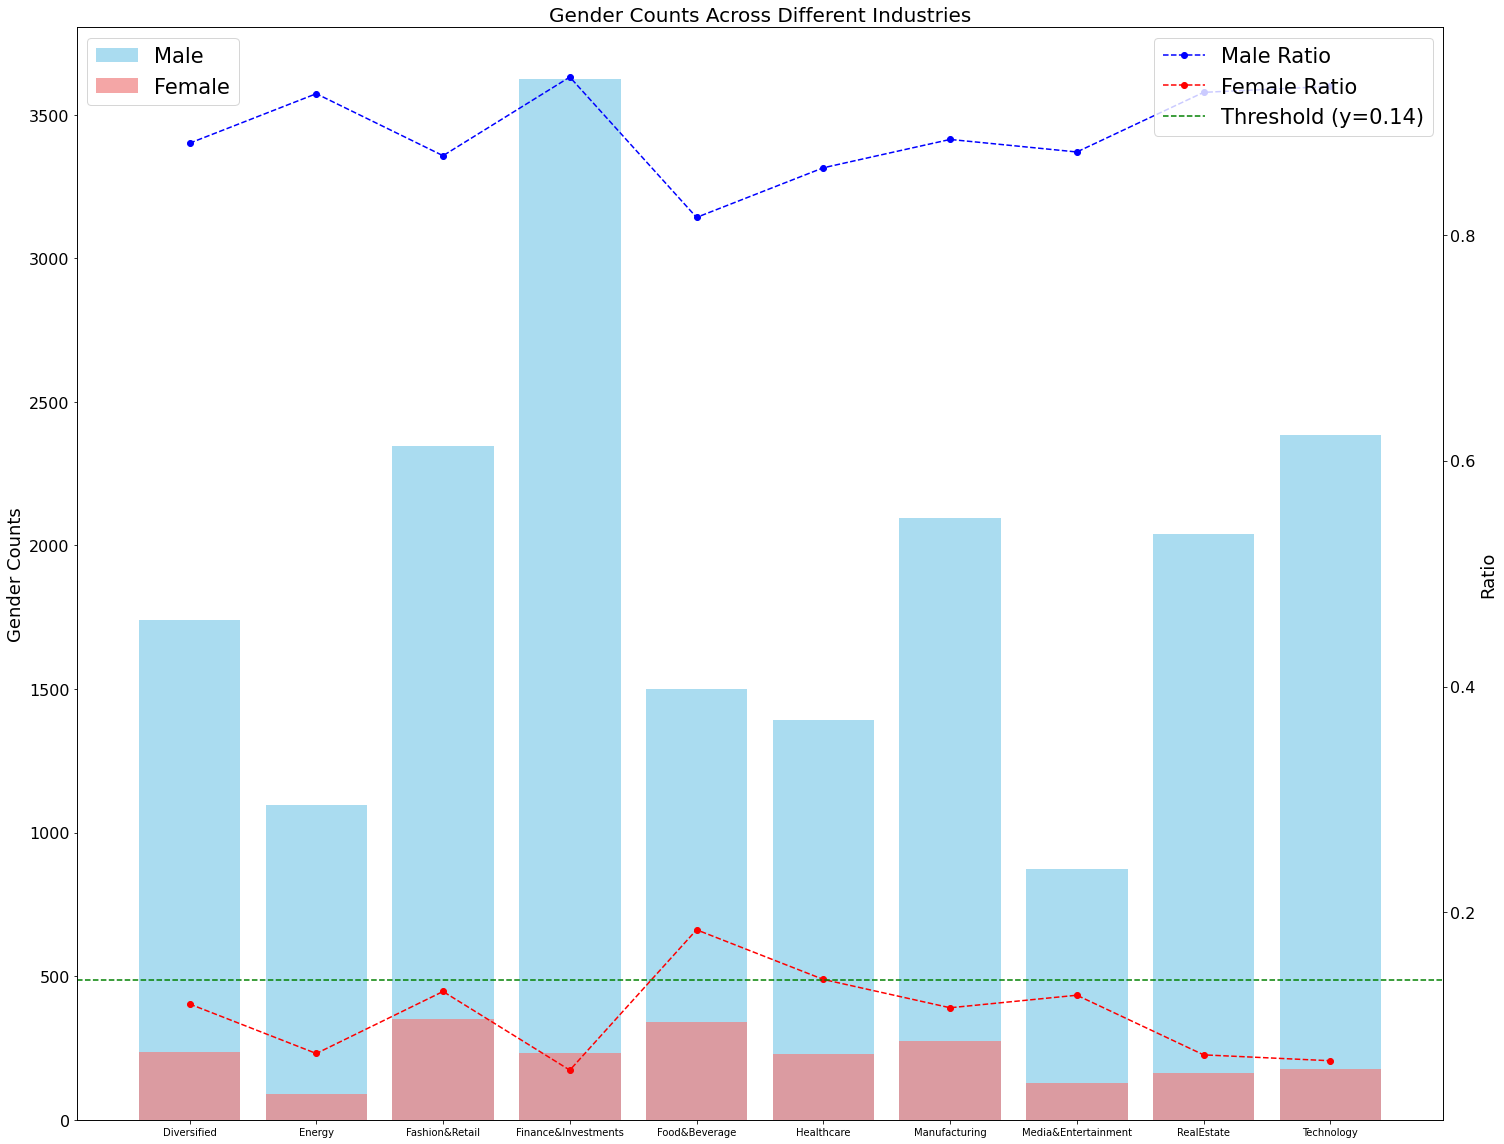

In [60]:
gender_counts_industry = df_focus_industry.groupby(['business_industries', 'gender']).size().unstack().fillna(0)
total_counts_industry = gender_counts_industry['Male'] + gender_counts_industry['Female']

# 计算男女占比
male_ratios = gender_counts_industry['Male'] / total_counts_industry
female_ratios = gender_counts_industry['Female'] / total_counts_industry

# 创建图表
fig, ax1 = plt.subplots(figsize=(21, 16))

# 绘制男女数量对比（左 Y 轴）
ax1.bar(gender_counts_industry.index, gender_counts_industry['Male'], label='Male', color='skyblue', alpha=0.7)
ax1.bar(gender_counts_industry.index, gender_counts_industry['Female'], label='Female', color='lightcoral', alpha=0.7)
ax1.set_ylabel('Gender Counts', color='black', fontsize=18)
ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
ax1.legend(loc='upper left')

# 创建右 Y 轴，绘制男女占比对比
ax2 = ax1.twinx()
ax2.plot(gender_counts_industry.index, male_ratios, label='Male Ratio', color='blue', marker='o', linestyle='--')
ax2.plot(gender_counts_industry.index, female_ratios, label='Female Ratio', color='red', marker='o', linestyle='--')
ax2.axhline(y=0.14, color='green', linestyle='--', label='Threshold (y=0.14)')
ax2.set_ylabel('Ratio', color='black', fontsize=18)
ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
ax2.legend(loc='upper right')

# 设置 x 轴标签和标题
plt.xlabel('Industry', fontsize=18)
plt.xticks(rotation=90, ha='center', fontsize=16)
plt.ylabel('Ratio', fontsize=18)

plt.title('Gender Counts Across Different Industries', fontsize=20) 
plt.yticks(fontsize=16)

plt.tight_layout()
legend = ax1.legend(loc='upper left', fontsize=21)
legend2 = ax2.legend(loc='upper right', fontsize=21)
plt.savefig('gender.png')
plt.show()
